In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('outliersData.csv',delimiter=',',skip_header=1)
data.shape

(100, 2)

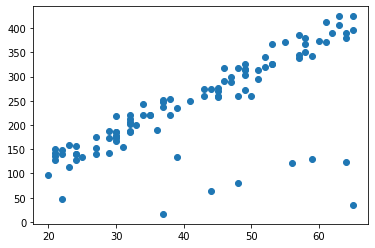

In [3]:
plt.scatter(data[:,0],data[:,1])

In [4]:
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

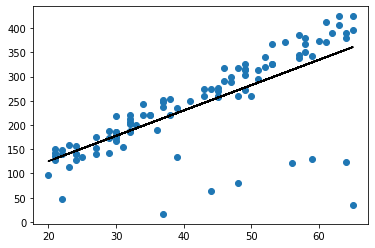

In [7]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='black')

In [8]:
reg.score(x,y)

0.524800575626366

In [9]:
def outlierCleaner(y_predicted,x,y):
    cleaned_data = []
    import numpy as np
    error = np.abs(y-y_predicted)
    n = int(len(error)*0.1)
    ind = np.argpartition(error.ravel(),-n)[-n:]
    x_clean = np.delete(x,ind)
    y_clean = np.delete(y,ind)
    err = np.delete(error,ind)
    cleaned_data = zip(x_clean,y_clean,err)
    return cleaned_data

In [10]:
cleaned = outlierCleaner(reg.predict(x),x,y)
cleaned_x,cleaned_y,err =  zip(*cleaned)
cleanedx = np.array(cleaned_x).reshape(-1,1)
cleanedy = np.array(cleaned_y).reshape(-1,1)

In [13]:
reg2 = LinearRegression()
reg2.fit(cleanedx,cleanedy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

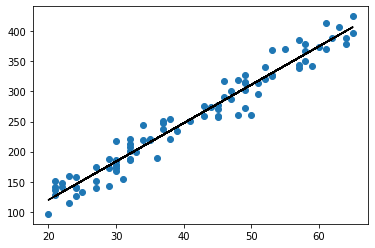

In [14]:
plt.scatter(cleanedx,cleanedy)
plt.plot(cleanedx,reg2.predict(cleanedx),color='black')

In [15]:
reg2.score(cleanedx,cleanedy)

0.954451366479215